<a href="https://colab.research.google.com/github/caesarstefanus/hello-world/blob/master/neural_network_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#0
print ("hello world!");

hello world!


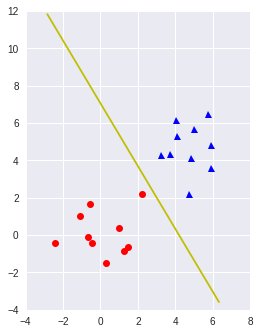

0
1


In [2]:
#1
#simple perceptron
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def newline(p1, p2, clr):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = clr)
    ax.add_line(l)
    return l
  
rng = np.random.RandomState(123)

d = 2   #dimension
N = 10  #number of data for each pattern
mean = 5 #avg for fired neuron data values

x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])

x = np.concatenate((x1, x2), axis = 0)

w = np.zeros(d)
b = 0

def y(x):
  return step(np.dot(w, x) + b)

def step(x):
  return 1 * (x > 0)

def t(i):
  if i < N:
    return 0
  else:
    return 1

#learning process

while True:
  #parameter update?
  #if all data has been classified correctly then break
  classified = True
  for i in range(N * 2):
    delta_w = (t(i) - y(x[i])) * x[i]
    delta_b = (t(i) - y(x[i]))
    w += delta_w
    b += delta_b
    classified *= all(delta_w == 0) * (delta_b == 0)
  if classified:
    break

#plotting

#print(x)
#print(x1[:,0])
#print(x2[:,1])
#plot
#plt.plot(x, 'r^')
#plt.plot(x, 'b^')
#a, b = np.polyfit(x1, x2, 1)
#_ = plt.plot(x1, x2, 'o', np.arange(20), a*np.arange(20)+b, '-')

#print(w[0])
#print(w[1])
#print(-b/w[0])
#print(b)

plt.plot(x1[:,0], x1[:,1],'ro')
plt.plot(x2[:,0], x2[:,1],'b^')

#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'g-')
newline([0, -b/w[1]], [-b/w[0], 0], 'y')
plt.axis([-4, 8, -4, 12])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
print(y([0, 0]))
print(y([5, 5]))

In [3]:
#2
#logistic regression
#logistic regression using tensorflow

import numpy as np
import tensorflow as tf

#model settings

#random number seed
tf.set_random_seed(0)

#initialize with zero matrix
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))


x = tf.placeholder(tf.float32, shape = [None, 2])
t = tf.placeholder(tf.float32, shape = [None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

#cross entropy error function
cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

#learning model

#OR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

#initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#learning
for epoch in range(200):
  sess.run(train_step, feed_dict = {
      x: X,
      t: Y
  })
  
#check the learning result

classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X,
    t: Y
})

prob = y.eval(session = sess, feed_dict = {
    x: X
})

print("classified:")
print(classified)
print()
print("output probability:")
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.22355042]
 [0.9142595 ]
 [0.9142595 ]
 [0.99747425]]


In [4]:
#22
#logistic regression
#logistic regression using keras

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

#model settings

model = Sequential([Dense(input_dim = 2, units = 1), Activation("sigmoid")])

#model = Sequential()
#model.add(Dense(input_dim = 2, units = 1))
#model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = SGD(lr = 0.1))

#learning model

#OR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

model.fit(X, Y, epochs = 200, batch_size = 1)

#check the learning result

classes = model.predict_classes(X, batch_size = 1)
prob = model.predict_proba(X, batch_size = 1)

print("classified:")
print(Y == classes)
print()
print("output probability:")
print(prob)

Using TensorFlow backend.


Epoch 1/200
4/4 [==============================] - 0s 57ms/step - loss: 0.6378
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5876
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5195
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4957
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4763
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4363
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4262
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4095
Epoch 13/200
4/4 [==============================] - 0s 2ms/s

[[-1.1138157   0.30471215  0.80910385]
 [ 0.80815846  0.28302822 -1.0911863 ]]
[-0.05472336  0.10325845 -0.04853513]

[-1.1138157   0.30471215  0.80910385]
[ 0.80815846  0.28302822 -1.0911863 ]
-0.11137026
0.3008431
0.30094388
-0.11045843
classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[4.9914347e-11 1.6199404e-03 9.9838006e-01]
 [9.8251867e-01 1.7481312e-02 4.4315087e-08]
 [9.4492441e-01 5.5075299e-02 3.1731304e-07]
 [9.7161996e-01 2.8380051e-02 1.2833701e-08]
 [4.2391010e-02 9.4409913e-01 1.3509892e-02]
 [1.1841307e-10 3.4140114e-04 9.9965858e-01]
 [9.9855334e-01 1.4466129e-03 1.7070331e-09]
 [9.1348273e-01 8.6516440e-02 7.7683677e-07]
 [9.9848360e-01 1.5163855e-03 6.0926930e-10]
 [2.4503580e-11 4.2958956e-04 9.9957043e-01]]


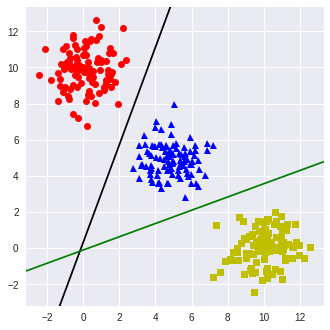

In [5]:
#31
#multi-class logistic regression using tensorflow

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.utils import shuffle

rng = np.random.RandomState(123)

def newline(p1, p2, clr):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = clr)
    ax.add_line(l)
    return l

M = 2 #input dimension
K = 3 #number of classes
n = 100 #number of data for each class
N = n * K #total data

#X1 = np.random.randn(n, M) + np.array([0, 10])
#X2 = np.random.randn(n, M) + np.array([5, 5])
#X3 = np.random.randn(n, M) + np.array([10, 0])

X1 = rng.randn(n, M) + np.array([0, 10])
X2 = rng.randn(n, M) + np.array([5, 5])
X3 = rng.randn(n, M) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

#model settings

W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape = [None, M])
t = tf.placeholder(tf.float32, shape = [None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)


cross_entropy = tf.reduce_mean(- tf.reduce_sum(t * tf.log(y), 
                               reduction_indices = [1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

batch_size = 50
n_batches = N // batch_size

#init?
#with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())

#initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(20):
  X_, Y_ = shuffle(X, Y)
  
  for i in range(n_batches):
    start = i * batch_size
    end = start + batch_size
    
    sess.run(train_step, feed_dict = {
        x: X_[start:end],
        t: Y_[start:end]
    })


X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session = sess, feed_dict = {
    x: X_[0:10]
})

plt.plot(X1[:,0], X1[:,1],'ro')
plt.plot(X2[:,0], X2[:,1],'b^')
plt.plot(X3[:,0], X3[:,1],'ys')


print(sess.run(W))
print(sess.run(b))
print()
#with tf.Session() as sess:
 # print(sess.run(W))
  #print(sess.run(b))
  
#transform tf.Variable to tf.Tensor to NumPy
tW = tf.convert_to_tensor(W)
npW = sess.run(W)
tb = tf.convert_to_tensor(b)
npb = sess.run(b)
#print(numtest1[0, 1])
#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'y-')

#data1 and data2
print(npW[0, :])
print(npW[1, :])
temp11 = -(npb[0] - npb[1]) / (npW[0, 0] - npW[0, 1])
temp12 = -(npb[0] - npb[1]) / (npW[1, 0] - npW[1, 1])
print(temp11)
print(temp12)
newline([0, temp12], [temp11, 0], 'black')

#data2 and data3
temp21 = -(npb[2] - npb[1]) / (npW[0, 2] - npW[0, 1])
temp22 = -(npb[2] - npb[1]) / (npW[1, 2] - npW[1, 1])
print(temp21)
print(temp22)
newline([0, temp22], [temp21, 0], 'green')
plt.gca().set_aspect('equal', adjustable='box')
#plt.plot([0, temp1], [temp2, 0], 'b-')
#plt.axis([-4, 8, -4, 12])
print("classified:")
print(classified)
print()
print("output probability:")
print(prob)

Epoch 1/20
300/300 [==============================] - 0s 384us/step - loss: 4.2666
Epoch 2/20
300/300 [==============================] - 0s 37us/step - loss: 0.2232
Epoch 3/20
300/300 [==============================] - 0s 33us/step - loss: 0.1511
Epoch 4/20
300/300 [==============================] - 0s 35us/step - loss: 0.1153
Epoch 5/20
300/300 [==============================] - 0s 34us/step - loss: 0.0969
Epoch 6/20
300/300 [==============================] - 0s 37us/step - loss: 0.0838
Epoch 7/20
300/300 [==============================] - 0s 39us/step - loss: 0.0730
Epoch 8/20
300/300 [==============================] - 0s 45us/step - loss: 0.0657
Epoch 9/20
300/300 [==============================] - 0s 33us/step - loss: 0.0589
Epoch 10/20
300/300 [==============================] - 0s 40us/step - loss: 0.0544
Epoch 11/20
300/300 [==============================] - 0s 51us/step - loss: 0.0504
Epoch 12/20
300/300 [==============================] - 0s 43us/step - loss: 0.0466
Epoch 13/20


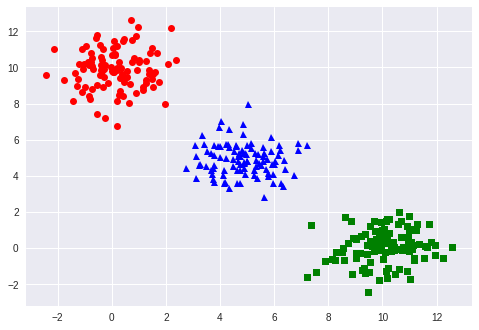

In [6]:
#32
#multi-class logistic regression using keras

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

rng = np.random.RandomState(123)

M = 2 #input dimension
K = 3 #number of classes
n = 100 #number of data for each class
N = n * K #total data

#X1 = np.random.randn(n, M) + np.array([0, 10])
#X2 = np.random.randn(n, M) + np.array([5, 5])
#X3 = np.random.randn(n, M) + np.array([10, 0])

X1 = rng.randn(n, M) + np.array([0, 10])
X2 = rng.randn(n, M) + np.array([5, 5])
X3 = rng.randn(n, M) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

model = Sequential()
model.add(Dense(input_dim = M, units = K))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.1))

#learning model

minibatch_size = 50

model.fit(X, Y, epochs = 20, batch_size = minibatch_size)

#check the learning result

X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size = minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size = 1)

plt.plot(X1[:,0], X1[:,1],'ro')
plt.plot(X2[:,0], X2[:,1],'b^')
plt.plot(X3[:,0], X3[:,1],'gs')

#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'g-')
#plt.axis([-4, 8, -4, 12])
print("classified:")
print(np.argmax(model.predict(X_[0:10]), axis = 1) == classes)
print()
print("output probability:")
print(prob)

In [7]:
#41
#multi-layer perceptron (Tensorflow)

#XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

x = tf.placeholder(tf.float32, shape = [None, 2])
t = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.truncated_normal([2, 2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

#initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict = {
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print("epoch:", epoch)

classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X,
    t: Y
})
prob = y.eval(session = sess, feed_dict = {
    x: X
})

#plt.plot(X1[:,0], X1[:,1],'ro')
#plt.plot(X2[:,0], X2[:,1],'b^')
#plt.plot(X3[:,0], X3[:,1],'ys')

'''
print(sess.run(W))
print(sess.run(b))
print()
#with tf.Session() as sess:
 # print(sess.run(W))
  #print(sess.run(b))
  
#transform tf.Variable to tf.Tensor to NumPy
tW = tf.convert_to_tensor(W)
npW = sess.run(W)
tb = tf.convert_to_tensor(b)
npb = sess.run(b)
#print(numtest1[0, 1])
#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'y-')

#data1 and data2
print(npW[0, :])
print(npW[1, :])
temp11 = -(npb[0] - npb[1]) / (npW[0, 0] - npW[0, 1])
temp12 = -(npb[0] - npb[1]) / (npW[1, 0] - npW[1, 1])
print(temp11)
print(temp12)
newline([0, temp12], [temp11, 0], 'black')

#data2 and data3
temp21 = -(npb[2] - npb[1]) / (npW[0, 2] - npW[0, 1])
temp22 = -(npb[2] - npb[1]) / (npW[1, 2] - npW[1, 1])
print(temp21)
print(temp22)
newline([0, temp22], [temp21, 0], 'green')
#plt.plot([0, temp1], [temp2, 0], 'b-')
#plt.axis([-4, 8, -4, 12])
'''
print("classified:")
print(classified)
print()
print("output probability:")
print(prob)       

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
classified:
[[ True]
 [ True]
 [False]
 [ True]]

output probability:
[[0.4996294 ]
 [0.50697154]
 [0.49250835]
 [0.49898675]]


In [8]:
#42
#multi-layer perceptron (Keras)

#XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential()

model.add(Dense(input_dim = 2, units = 2))
model.add(Activation("sigmoid"))

model.add(Dense(units = 1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = SGD(lr = 0.1))

model.fit(X, Y, epochs = 1000, batch_size = 4)

classes = model.predict_classes(X, batch_size = 4)
prob = model.predict_proba(X, batch_size = 4)

print("classified:")
print(Y == classes)
print()
print("output probability:")
print(prob)

Epoch 1/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.6943
Epoch 2/1000
4/4 [==============================] - 0s 396us/step - loss: 0.6943
Epoch 3/1000
4/4 [==============================] - 0s 432us/step - loss: 0.6943
Epoch 4/1000
4/4 [==============================] - 0s 277us/step - loss: 0.6943
Epoch 5/1000
4/4 [==============================] - 0s 348us/step - loss: 0.6942
Epoch 6/1000
4/4 [==============================] - 0s 253us/step - loss: 0.6942
Epoch 7/1000
4/4 [==============================] - 0s 297us/step - loss: 0.6942
Epoch 8/1000
4/4 [==============================] - 0s 262us/step - loss: 0.6942
Epoch 9/1000
4/4 [==============================] - 0s 243us/step - loss: 0.6942
Epoch 10/1000
4/4 [==============================] - 0s 228us/step - loss: 0.6942
Epoch 11/1000
4/4 [==============================] - 0s 355us/step - loss: 0.6942
Epoch 12/1000
4/4 [==============================] - 0s 351us/step - loss: 0.6942
Epoch 13/1000
4/4 [=======

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


accuracy:  0.81666666
[[ 6.312606 ]
 [ 2.6440256]
 [-4.928041 ]]
[-1.2345866]



"\ntV = tf.convert_to_tensor(V)\nnpV = sess.run(V)\ntc = tf.convert_to_tensor(c)\nnpc = sess.run(c)\n#print(numtest1[0, 1])\n#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'y-')\n\n#data1 and data2\nprint(npV[0, :])\nprint(npV[1, :])\ntemp11 = -(npc[0] - npc[1]) / (npV[0, 0] - npV[0, 1])\ntemp12 = -(npc[0] - npc[1]) / (npV[1, 0] - npV[1, 1])\nprint(temp11)\nprint(temp12)\nnewline([0, temp12], [temp11, 0], 'yellow')\n\n#data2 and data3\ntemp21 = -(npb[2] - npb[1]) / (npW[0, 2] - npW[0, 1])\ntemp22 = -(npb[2] - npb[1]) / (npW[1, 2] - npW[1, 1])\nprint(temp21)\nprint(temp22)\nnewline([0, temp22], [temp21, 0], 'green')\n"

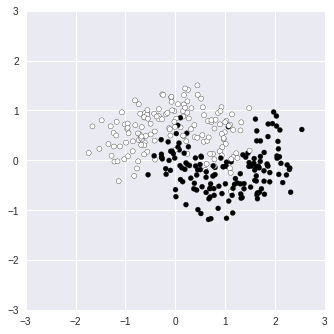

In [9]:
#51
#model evaluation
#learn to plot weird data
#using TensorFlow

import tensorflow as tf
import keras
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

N = 300
X, y = datasets.make_moons(N, noise = 0.3)
#X contains coordinate, y contains the class (0 or 1)
#plt.plot(X[:, 0], X[:, 1], 'rs')
#plt.plot(y[: 0], y[: 1], 'b^')

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

#plt.scatter(X[:, 0], X[:, 1], marker='s', c=y, s=25, edgecolor='k')

num_hidden = 2
num_hidden = 3
x = tf.placeholder(tf.float32, shape = [None, 2])
t = tf.placeholder(tf.float32, shape = [None, 1])

#input -> hidden

W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

#hidden -> output

V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#learning
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
  X_, Y_ = shuffle(X_train, Y_train)
  
  for i in range(n_batches):
    start = i * batch_size
    end = start + batch_size
    
    sess.run(train_step, feed_dict = {
        x: X_[start: end],
        t: Y_[start: end]
    })

accuracy_rate = accuracy.eval(session = sess, feed_dict = {
    x: X_test,
    t: Y_test
})

print('accuracy: ', accuracy_rate)

#plotting

axis_limit = 3
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-axis_limit, axis_limit, -axis_limit, axis_limit])

#print(sess.run(y))
print(sess.run(V))
print(sess.run(c))
print()
  
#transform tf.Variable to tf.Tensor to NumPy
'''
tV = tf.convert_to_tensor(V)
npV = sess.run(V)
tc = tf.convert_to_tensor(c)
npc = sess.run(c)
#print(numtest1[0, 1])
#plt.plot([0, -b/w[0]], [-b/w[1], 0], 'y-')

#data1 and data2
print(npV[0, :])
print(npV[1, :])
temp11 = -(npc[0] - npc[1]) / (npV[0, 0] - npV[0, 1])
temp12 = -(npc[0] - npc[1]) / (npV[1, 0] - npV[1, 1])
print(temp11)
print(temp12)
newline([0, temp12], [temp11, 0], 'yellow')

#data2 and data3
temp21 = -(npb[2] - npb[1]) / (npW[0, 2] - npW[0, 1])
temp22 = -(npb[2] - npb[1]) / (npW[1, 2] - npW[1, 1])
print(temp21)
print(temp22)
newline([0, temp22], [temp21, 0], 'green')
'''

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 1/500
240/240 [==============================] - 0s 927us/step - loss: 0.7023 - acc: 0.3625
Epoch 2/500
240/240 [==============================] - 0s 26us/step - loss: 0.7017 - acc: 0.3458
Epoch 3/500
240/240 [==============================] - 0s 27us/step - loss: 0.7013 - acc: 0.3542
Epoch 4/500
240/240 [==============================] - 0s 26us/step - loss: 0.7010 - acc: 0.3417
Epoch 5/500
240/240 [==============================] - 0s 26us/step - loss: 0.7006 - acc: 0.3833
Epoch 6/500
240/240 [==============================] - 0s 23us/step - loss: 0.7001 - acc: 0.3708
Epoch 7/500
240/240 [==============================] - 0s 24us/step - loss: 0.6997 - acc: 0.3750
Epoch 8/500
240/240 [==============================] - 0s 23us/step - loss: 0.6992 - acc: 0.3500
Epoch 9/500
240/240 [==============================] - 0s 21us/step - loss: 0.6988 - acc: 0.3583
Epoch 10/500
240/240 [==============================] - 0s 23us/step - loss: 0.6984 - acc: 0.3417
Epoch 11/500
240/240 [======

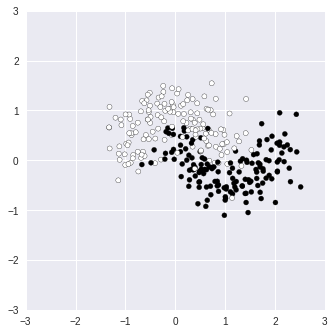

In [10]:
#52
#model evaluation (Keras)

#learn to plot weird data
#!apt-get -qq install -y graphviz && pip install pydot
#!pip install pydot_ng
#import pydot_ng as pydot
#import pydot
#from pydot import Dot
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#from keras.utils.visualize_util import plot
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import plot_model
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

N = 300
X, y = datasets.make_moons(N, noise = 0.3)
#X contains coordinate, y contains the class (0 or 1)
#plt.plot(X[:, 0], X[:, 1], 'rs')
#plt.plot(y[: 0], y[: 1], 'b^')

#Y = y.reshape(N, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

#plt.scatter(X[:, 0], X[:, 1], marker='s', c=y, s=25, edgecolor='k')

model = Sequential()
model.add(Dense(3, input_dim = 2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.05), metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 500, batch_size = 200)

loss_and_metrics = model.evaluate(X_test, y_test)

print('error function :', loss_and_metrics[0])
print('prediction accuracy :', loss_and_metrics[1])
#print('accuracy: ', accuracy_rate)

#plot(model, to_file='model.png')
#plot_model(model)
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

print(model.summary())
print(model.get_weights())
#plotting
axis_limit = 3
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-axis_limit, axis_limit, -axis_limit, axis_limit])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


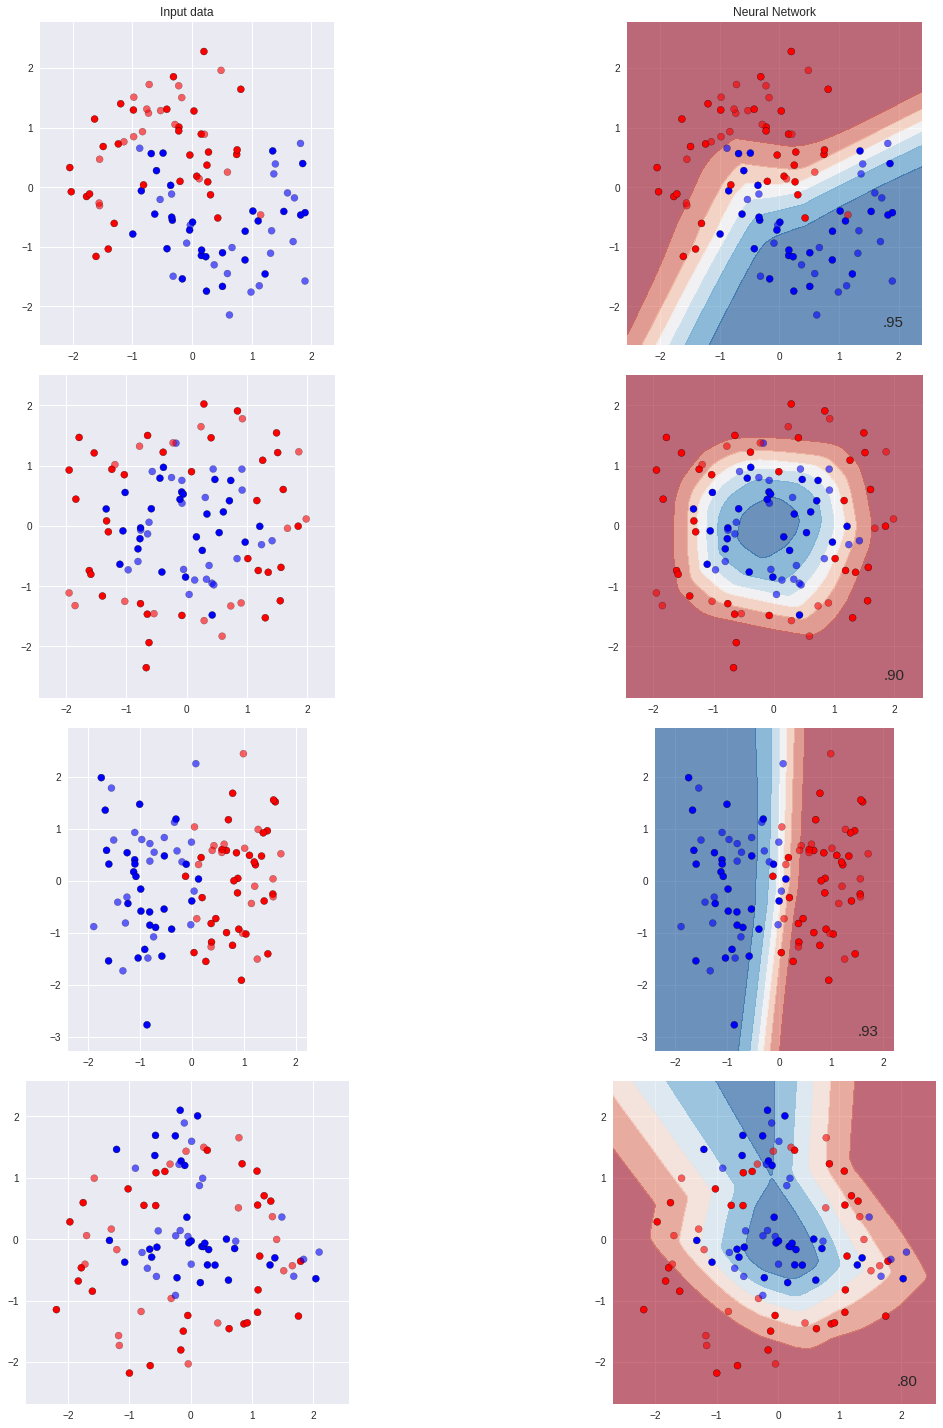

In [11]:
#5
#model evaluation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  #step size in the mesh. used in np.arange. must be smaller than xmax-xmin and ymax-ymin

name = "Neural Network"

classifier = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.001)
#MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', learning_rate='constant', learning_rate_init=0.001)
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
#solver : {‘lbfgs’, ‘sgd’, ‘adam’}
#learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}


#generate a random n_class classification problem
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

#special data
#default size = 100
outer_radius_const = 1
temp = make_circles(noise=0.2, factor=0.2, random_state=2)
#print(temp[0][:,0])
for i in range(0, 50):
  if(temp[1][i] == 1):
    choose = rng.choice([0, 1])
    temp[0][i, choose] *= (outer_radius_const + (1 / temp[0][i, choose]))
    #if(temp[0][i, choose] < 0):
     # temp[0][i, choose] -= outer_radius;
    #else:
     # temp[0][i, choose] += outer_radius;
'''
r = 3
r1 = 6
r2 = 9
#xc1 = rng.randn(N, d) + np.array([0, 0])
xc1 = 2 * r2 * rng.random_sample((N, d)) - r2
#print(xc1)
xc2 = 2 * r1 * rng.random_sample((N, d)) - r1#np.zeros((N, d))
for i in range(0, N):
  if xc2[i, 0]**2 + xc2[i, 1]**2 <= r ** 2:
    choose = rng.choice([0, 1])
    if(xc2[i, choose] < 0):
      xc2[i, choose] -= r;
    else:
      xc2[i, choose] += r;
for i in range(0, N):
  dist = xc1[i, 0]**2 + xc1[i, 1]**2
  if dist > r ** 2 and dist < r2 ** 2:
    choose = rng.choice([0, 1])
    if(xc1[i, choose] < 0):
      xc1[i, choose] -= r;
    else:
      xc1[i, choose] += r;
plt.plot(xc1[:, 0], xc1[:, 1], 'r^')
plt.plot(xc2[:, 0], xc2[:, 1], 'bo')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-axis_limit, axis_limit, -axis_limit, axis_limit])

'''
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable, #defined previously
            temp
            ]


figure = plt.figure(figsize=(20, 20))
i = 1 #figure index (where to put)
#iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    #preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #just plot the dataset first
    cm = plt.cm.RdBu #Red -> Blue color map
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) #Red Blue Hex
    ax = plt.subplot(len(datasets), 2, i) #subplot(nrows, ncols, index where to put)
    if ds_cnt == 0:
        ax.set_title("Input data") #set the title of the column
    #Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    #and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    #set axis limit
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    #don't need ticks for both axis
    #ax.set_xticks(())
    #ax.set_yticks(())
    plt.gca().set_aspect('equal', adjustable='box')
    #increase index of graphics
    i += 1
    #iterate over classifiers
    #for name, clf in zip(names, classifiers):
    clf = classifier
    
    #prepare datasets
    ax = plt.subplot(len(datasets), 2, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #Plot the decision boundary. For that, we will assign a color to each
    #point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    #Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.6)

    #Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    #and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    #set axis limit
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    #insert title
    if ds_cnt == 0:
        ax.set_title(name)
    #insert score (prediction accuracy)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    plt.gca().set_aspect('equal', adjustable='box')
    i += 1

#adjust graphics & show
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


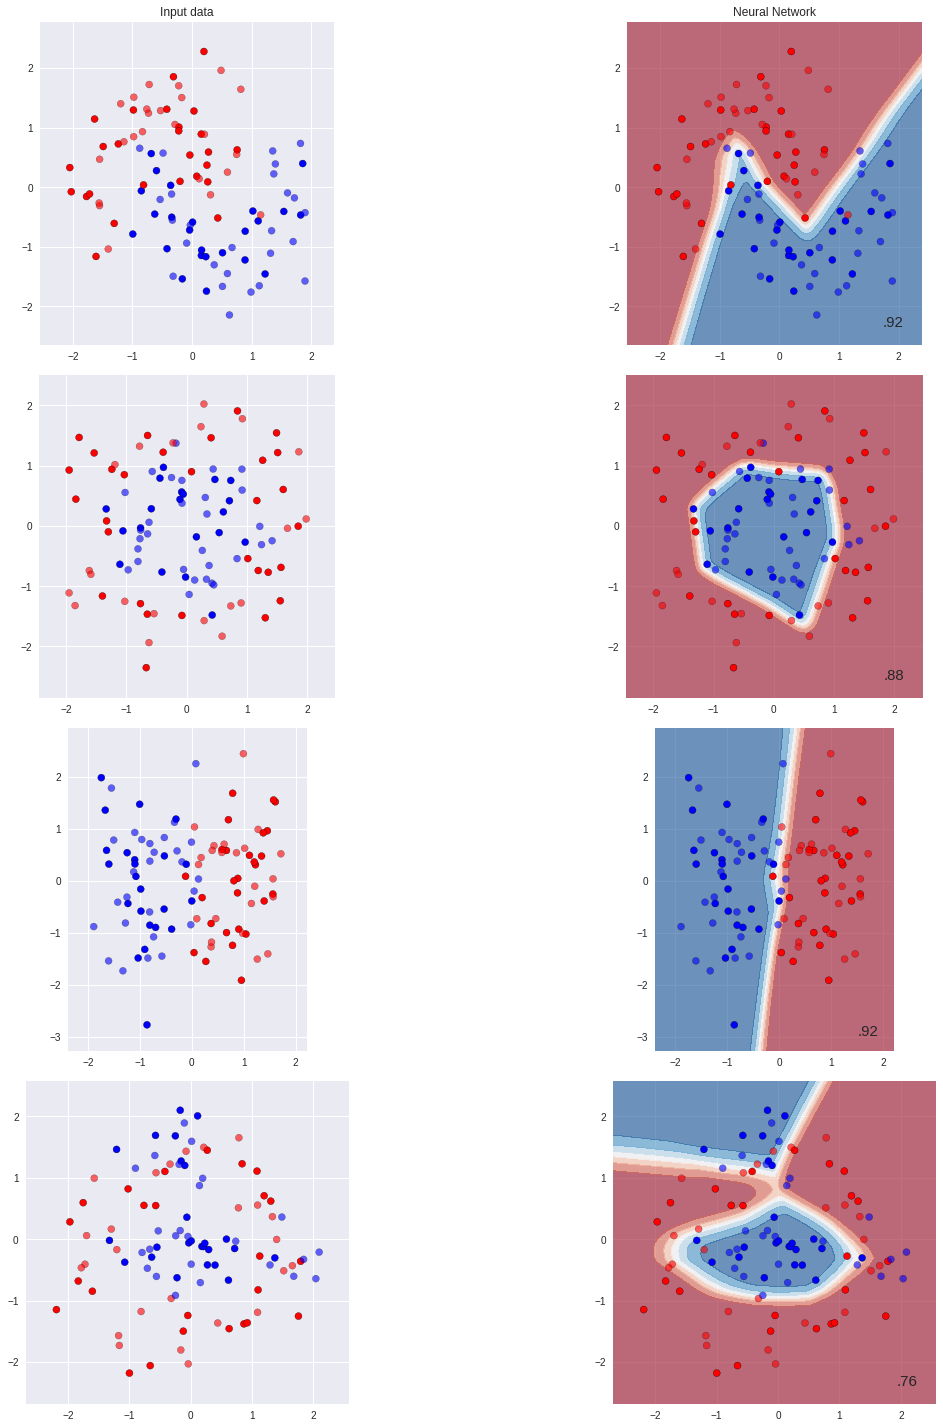

In [12]:
#5
#model evaluation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  #step size in the mesh. used in np.arange. must be smaller than xmax-xmin and ymax-ymin

name = "Neural Network"

classifier = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.001)
#MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', learning_rate='constant', learning_rate_init=0.001)
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
#solver : {‘lbfgs’, ‘sgd’, ‘adam’}
#learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}


#generate a random n_class classification problem
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

#special data
#default size = 100
outer_radius_const = 1
temp = make_circles(noise=0.2, factor=0.2, random_state=2)
#print(temp[0][:,0])
for i in range(0, 50):
  if(temp[1][i] == 1):
    choose = rng.choice([0, 1])
    temp[0][i, choose] *= (outer_radius_const + (1 / temp[0][i, choose]))
    #if(temp[0][i, choose] < 0):
     # temp[0][i, choose] -= outer_radius;
    #else:
     # temp[0][i, choose] += outer_radius;
'''
r = 3
r1 = 6
r2 = 9
#xc1 = rng.randn(N, d) + np.array([0, 0])
xc1 = 2 * r2 * rng.random_sample((N, d)) - r2
#print(xc1)
xc2 = 2 * r1 * rng.random_sample((N, d)) - r1#np.zeros((N, d))
for i in range(0, N):
  if xc2[i, 0]**2 + xc2[i, 1]**2 <= r ** 2:
    choose = rng.choice([0, 1])
    if(xc2[i, choose] < 0):
      xc2[i, choose] -= r;
    else:
      xc2[i, choose] += r;
for i in range(0, N):
  dist = xc1[i, 0]**2 + xc1[i, 1]**2
  if dist > r ** 2 and dist < r2 ** 2:
    choose = rng.choice([0, 1])
    if(xc1[i, choose] < 0):
      xc1[i, choose] -= r;
    else:
      xc1[i, choose] += r;
plt.plot(xc1[:, 0], xc1[:, 1], 'r^')
plt.plot(xc2[:, 0], xc2[:, 1], 'bo')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-axis_limit, axis_limit, -axis_limit, axis_limit])

'''
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable, #defined previously
            temp
            ]


figure = plt.figure(figsize=(20, 20))
i = 1 #figure index (where to put)
#iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    #preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #just plot the dataset first
    cm = plt.cm.RdBu #Red -> Blue color map
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) #Red Blue Hex
    ax = plt.subplot(len(datasets), 2, i) #subplot(nrows, ncols, index where to put)
    if ds_cnt == 0:
        ax.set_title("Input data") #set the title of the column
    #Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    #and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    #set axis limit
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    #don't need ticks for both axis
    #ax.set_xticks(())
    #ax.set_yticks(())
    plt.gca().set_aspect('equal', adjustable='box')
    #increase index of graphics
    i += 1
    #iterate over classifiers
    #for name, clf in zip(names, classifiers):
    clf = classifier
    
    #prepare datasets
    ax = plt.subplot(len(datasets), 2, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #Plot the decision boundary. For that, we will assign a color to each
    #point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    #Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.6)

    #Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    #and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    #set axis limit
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    #insert title
    if ds_cnt == 0:
        ax.set_title(name)
    #insert score (prediction accuracy)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    plt.gca().set_aspect('equal', adjustable='box')
    i += 1

#adjust graphics & show
plt.tight_layout()
plt.show()